In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


# If you have these qualifications, is it more worth to further education or more experience for each level?

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('Levels_Fyi_Salary_Data.csv')
amazon = data[data['company'] == 'Amazon']
amazon = amazon.replace({'level':{'SDE I':'L4','SDE II':'L5','SDE III':'L6','L6 SDM':'L6','6':'L6','L5 SDM':'L5','Principal SDE':'L7','Senior SDE':'L6','5':'L5','7':'L7','4':'L4','1':'L1','l5':'L5','l4':'L4','l6':'L6','l7':'L7','l1':'L1','l2':'L2','l3':'L3','2':'L2','3':'L3'}})
cleaned = amazon.loc[(amazon['level'] == 'L1') | (amazon['level']=='L2') | (amazon['level']=='L3') | (amazon['level']=='L4') | (amazon['level']=='L5') | (amazon['level']=='L6') | (amazon['level']=='L7') | (amazon['level']=='L8')]
cleaned = cleaned.sort_values(by=['level','totalyearlycompensation'], ascending=[False,False])

# from here onwards only add items

In [44]:
print("PermaHeadDamage:\n",data['Doctorate_Degree'].value_counts())
print("Masters:\n",data['Masters_Degree'].value_counts())
print("Bachelors:\n",data['Bachelors_Degree'].value_counts())
print("Highschool:\n",data['Highschool'].value_counts())
print("education:\n",data['Education'].value_counts())
fillededu = data[data['Education'].notnull()]
#fillededu.info()
#fillededu['company'].value_counts()
top5 = fillededu[fillededu['company'].isin(['Facebook','Google','Amazon','Apple','Microsoft'])]
#top5.info()
top5['company'].value_counts()

PermaHeadDamage:
 0    60839
1     1803
Name: Doctorate_Degree, dtype: int64
Masters:
 0    47251
1    15391
Name: Masters_Degree, dtype: int64
Bachelors:
 0    50037
1    12605
Name: Bachelors_Degree, dtype: int64
Highschool:
 0    62322
1      320
Name: Highschool, dtype: int64
education:
 Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64


Amazon       3665
Microsoft    2310
Google       1917
Facebook     1431
Apple         915
Name: company, dtype: int64

count       251.000000
mean     187081.673307
std       29755.239922
min       53000.000000
25%      178000.000000
50%      192000.000000
75%      208000.000000
max      222000.000000
Name: totalyearlycompensation, dtype: float64
count       150.000000
mean     258773.333333
std       29253.611414
min      223000.000000
25%      236250.000000
50%      251000.000000
75%      273750.000000
max      355000.000000
Name: totalyearlycompensation, dtype: float64


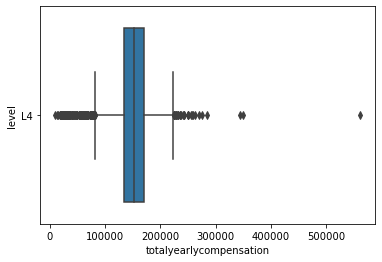

In [40]:
applemerick = data[(data['company'] == 'Apple')&(data['title']=='Software Engineer')]
applemerick.head()
applemerick["title"].value_counts()
applemerick["level"].value_counts()
#print(applemerick[applemerick['level']=='ICT3'].totalyearlycompensation.describe())
#print(applemerick[applemerick['level']=='ICT4'].totalyearlycompensation.describe())
#print(amazon[amazon['level']=='L4'].totalyearlycompensation.describe())
#sb.boxplot(data=amazon[amazon['level']=='L4'],x='totalyearlycompensation',y='level')
amazonIQRcomp = amazon[amazon['level']=='L4'].totalyearlycompensation.quantile(0.75) - amazon[amazon['level']=='L4'].totalyearlycompensation.quantile(0.25)
#print(amazonIQRcomp)
amazonupperboundcomp = amazon[amazon['level']=='L4'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcomp)
#print(amazonupperboundcomp)
appleict3tol4 = applemerick[(applemerick['level']=='ICT3')&(applemerick['totalyearlycompensation']<=amazonupperboundcomp)]
print(appleict3tol4.totalyearlycompensation.describe())
appleict3tol5 = applemerick[(applemerick['level']=='ICT3')&(applemerick['totalyearlycompensation']>amazonupperboundcomp)]
print(appleict3tol5.totalyearlycompensation.describe())